In [5]:
import warnings
warnings.filterwarnings('ignore')

import os
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [6]:
!apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [7]:
!unzip  '/content/drive/MyDrive/Stars.zip' -d './Stars/'
train_path = '/content/Stars/train'
test_path = '/content/Stars/test'


Streaming output truncated to the last 5000 lines.
  inflating: ./Stars/train/sad/Training_65242339.jpg  
  inflating: ./Stars/train/sad/Training_65267116.jpg  
  inflating: ./Stars/train/sad/Training_65275626.jpg  
  inflating: ./Stars/train/sad/Training_6529266.jpg  
  inflating: ./Stars/train/sad/Training_65329617.jpg  
  inflating: ./Stars/train/sad/Training_65338712.jpg  
  inflating: ./Stars/train/sad/Training_65338797.jpg  
  inflating: ./Stars/train/sad/Training_65387162.jpg  
  inflating: ./Stars/train/sad/Training_65404494.jpg  
  inflating: ./Stars/train/sad/Training_65426218.jpg  
  inflating: ./Stars/train/sad/Training_65430136.jpg  
  inflating: ./Stars/train/sad/Training_65437377.jpg  
  inflating: ./Stars/train/sad/Training_6545735.jpg  
  inflating: ./Stars/train/sad/Training_65463385.jpg  
  inflating: ./Stars/train/sad/Training_65473985.jpg  
  inflating: ./Stars/train/sad/Training_65502829.jpg  
  inflating: ./Stars/train/sad/Training_65505359.jpg  
  inflating: ./S

In [8]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for Id, img_path in enumerate(img_files):
        plt.subplot(5, 5, Id+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray')

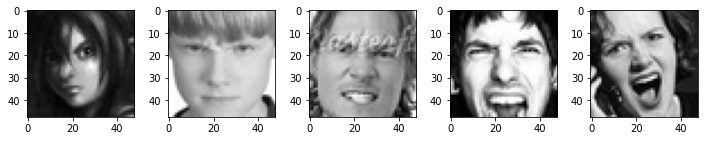

In [9]:
plot_images(train_path+'/angry')

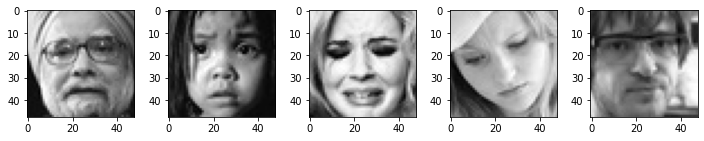

In [10]:
plot_images(train_path+'/sad')

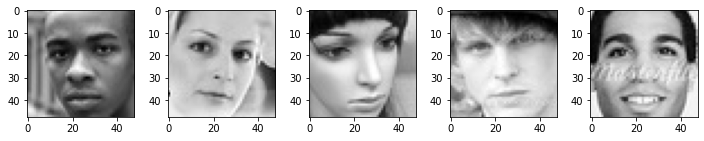

In [11]:
plot_images(train_path+'/neutral')

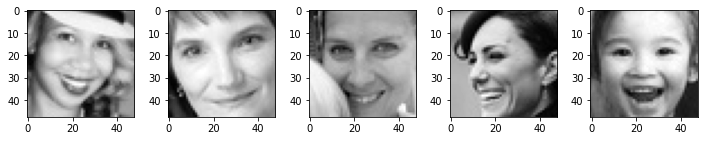

In [12]:
plot_images(train_path+'/happy')

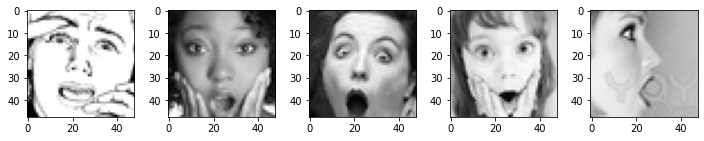

In [13]:
plot_images(train_path+'/surprise')

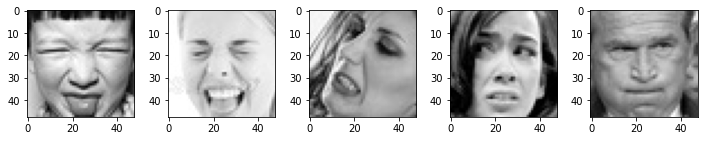

In [14]:
plot_images(train_path+'/disgust')

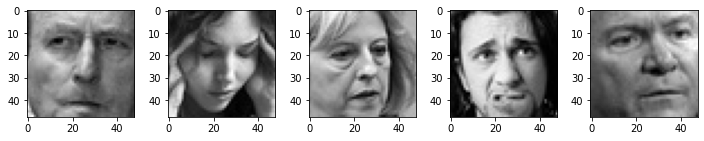

In [15]:
plot_images(train_path+'/fear')

In [16]:
emotion_labels = sorted(os.listdir(train_path))
print("Emotion labels:")
for i in emotion_labels:
  print(i)

Emotion labels:
angry
disgust
fear
happy
neutral
sad
surprise


In [17]:
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_data_gen.flow_from_directory(
        '/content/Stars/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [19]:
test_generator = test_data_gen.flow_from_directory(
        '/content/Stars/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


Building the Model

In [20]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

Training the model


In [22]:
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=5,
        validation_data=test_generator,
        validation_steps=7178 // 64)

Epoch 1/5
448/448 [==============================] - 324s 723ms/step - loss: 1.7987 - accuracy: 0.2630 - val_loss: 1.7038 - val_accuracy: 0.3355
Epoch 2/5
448/448 [==============================] - 332s 742ms/step - loss: 1.6255 - accuracy: 0.3661 - val_loss: 1.5301 - val_accuracy: 0.4223
Epoch 3/5
448/448 [==============================] - 322s 718ms/step - loss: 1.5197 - accuracy: 0.4161 - val_loss: 1.4539 - val_accuracy: 0.4473
Epoch 4/5
448/448 [==============================] - 322s 720ms/step - loss: 1.4441 - accuracy: 0.4460 - val_loss: 1.3869 - val_accuracy: 0.4778
Epoch 5/5
448/448 [==============================] - 323s 720ms/step - loss: 1.3838 - accuracy: 0.4765 - val_loss: 1.3504 - val_accuracy: 0.4879


In [24]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [25]:
emotion_model.save('emotion_detection_model.h5')
print("Model Saved!")

Model Saved!


In [26]:
emotion_model.save_weights('emotion_detection_model_weights.h5')
print("Model weights Saved!")

Model weights Saved!


In [27]:
accuracy = emotion_model_info.history['accuracy']
val_acc = emotion_model_info.history['val_accuracy']
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']
epochs = range(len(accuracy))

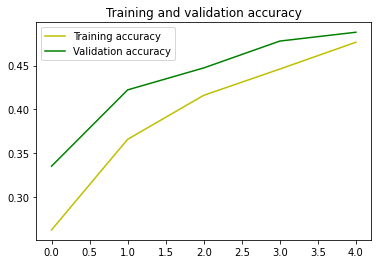

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(epochs, accuracy, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

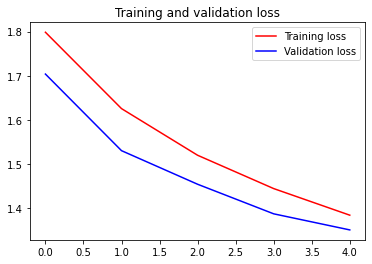

In [30]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()

In [31]:
from keras.preprocessing import image
import numpy as np

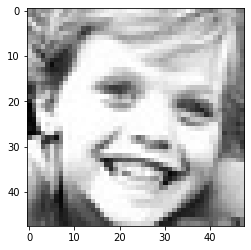

In [32]:
test_img_path = test_path+"/happy/PrivateTest_3447769.jpg"
test_img = image.load_img(test_img_path, target_size=(48,48), color_mode="grayscale")
test_img = np.array(test_img)
plt.imshow(test_img, cmap='gray')

In [33]:
print("Shape of Image:",test_img.shape)

Shape of Image: (48, 48)


In [34]:
test_img = np.expand_dims(test_img, axis=0)
test_img = test_img.reshape(1, 48, 48, 1)

In [35]:
result = emotion_model.predict(test_img)
result = list(result[0])
ind = result.index(max(result))
emotion = emotion_labels[ind]
print("Predicted emotion:",emotion)

Predicted emotion: happy


Audio to be Played

In [36]:
from IPython.display import Audio

In [37]:
main_songs_path = '/content/emotion-audio-files/'
song_path = main_songs_path+emotion
song = os.path.join(song_path,emotion)

In [38]:
print(f'Playing {emotion} song')

Playing happy song


In [ ]:
Audio(song + '.m4a', autoplay=True)